In [28]:
pip install pandas openpyxl matplotlib

Note: you may need to restart the kernel to use updated packages.


In [29]:
# Import necessary libraries
import pandas as pd
import xml.etree.ElementTree as ET

# Load social media usage data
social_media_file = "SocialMediaUsing.xlsx"  # File containing social media usage data
social_media_df = pd.read_excel(social_media_file)  # Read the Excel file into a DataFrame

# Load step count data (XML)
steps_file = "NumberOfSteps.xml"  # File containing step count data in XML format
tree = ET.parse(steps_file)  # Parse the XML file
root = tree.getroot()  # Get the root element of the XML tree

# Extract sample data from XML for inspection
for record in root.findall("./Record"):  # Iterate through all records in the XML file
    print(record.attrib)  # Print the attributes of the first record for inspection
    break  # Stop after the first record

{'type': 'HKQuantityTypeIdentifierHeight', 'sourceName': 'Sağlık', 'sourceVersion': '15.5', 'unit': 'cm', 'creationDate': '2022-08-05 22:35:33 +0300', 'startDate': '2022-08-05 22:35:33 +0300', 'endDate': '2022-08-05 22:35:33 +0300', 'value': '175.26'}


In [30]:
# Prepare a list to store step data
step_data = []

# Extract relevant data from XML records
for record in root.findall("./Record"):
    # Filter only step count data
    if record.attrib.get('type') == "HKQuantityTypeIdentifierStepCount":
        step_data.append({
            "startDate": record.attrib.get('startDate'),  # Record start date
            "endDate": record.attrib.get('endDate'),      # Record end date
            "value": int(float(record.attrib.get('value')))  # Step count value (converted to integer)
        })

# Convert the list of step data into a pandas DataFrame
steps_df = pd.DataFrame(step_data)

# Convert date columns to datetime objects for easier analysis
steps_df['startDate'] = pd.to_datetime(steps_df['startDate'])
steps_df['endDate'] = pd.to_datetime(steps_df['endDate'])

# Preview the first few rows of the step data
print(steps_df.head())

                  startDate                   endDate  value
0 2022-08-04 04:33:47+03:00 2022-08-04 04:41:52+03:00     88
1 2022-08-04 04:48:55+03:00 2022-08-04 04:49:21+03:00     39
2 2022-08-04 05:06:21+03:00 2022-08-04 05:12:59+03:00    261
3 2022-08-04 05:17:37+03:00 2022-08-04 05:22:31+03:00     82
4 2022-08-04 05:30:15+03:00 2022-08-04 05:30:33+03:00     33


In [31]:
# Group step data by date and calculate the daily step total
steps_df['date'] = steps_df['startDate'].dt.date  # Extract the date part from startDate
daily_steps = steps_df.groupby('date')['value'].sum().reset_index()

# Rename columns for clarity
daily_steps.rename(columns={'date': 'Date', 'value': 'TotalSteps'}, inplace=True)

# Preview the daily steps data
print(daily_steps.head())

         Date  TotalSteps
0  2022-08-04        2345
1  2022-08-05       13703
2  2022-08-06       21311
3  2022-08-07       40542
4  2022-08-08        4869


In [32]:
# Load social media usage data
social_media_df = pd.read_excel("SocialMediaUsing.xlsx")

# Ensure the date column in both dataframes is in datetime format
social_media_df['Date'] = pd.to_datetime(social_media_df['Date'])
daily_steps['Date'] = pd.to_datetime(daily_steps['Date'])

# Merge the two datasets on the Date column
merged_data = pd.merge(daily_steps, social_media_df, on='Date', how='inner')

# Preview the merged dataset
print(merged_data.head())

        Date  TotalSteps  Minute
0 2024-12-16        2999     255
1 2024-12-17       10757      40
2 2024-12-18        7658      82
3 2024-12-19        6493     200
4 2024-12-20        7645     120


In [33]:
print(daily_steps['Date'].head())  # Check dates in daily_steps
print(social_media_df['Date'].head())  # Check dates in social_media_df

0   2022-08-04
1   2022-08-05
2   2022-08-06
3   2022-08-07
4   2022-08-08
Name: Date, dtype: datetime64[ns]
0   2024-12-16
1   2024-12-17
2   2024-12-18
3   2024-12-19
4   2024-12-20
Name: Date, dtype: datetime64[ns]


In [34]:
# Filter daily_steps for dates in 2025
filtered_steps = daily_steps[(daily_steps['Date'] >= '2024-12-16') & (daily_steps['Date'] <= '2025-12-20')]
print(filtered_steps)

          Date  TotalSteps
863 2024-12-16        2999
864 2024-12-17       10757
865 2024-12-18        7658
866 2024-12-19        6493
867 2024-12-20        7645
868 2024-12-21        6781
869 2024-12-22        4433
870 2024-12-23        4215
871 2024-12-24       11397
872 2024-12-25        9492
873 2024-12-26        8318
874 2024-12-27        8168
875 2024-12-28        5969
876 2024-12-29        3118
877 2024-12-30        6405
878 2024-12-31        7369
879 2025-01-01       11302
880 2025-01-02        5833
881 2025-01-03        5437
882 2025-01-04       11306
883 2025-01-05        1667
884 2025-01-06        3693
885 2025-01-07       12232
886 2025-01-08        5170
887 2025-01-09       10692
888 2025-01-10        3333


In [35]:
merged_data = pd.merge(filtered_steps, social_media_df, on='Date', how='inner')
print(merged_data)

         Date  TotalSteps  Minute
0  2024-12-16        2999     255
1  2024-12-17       10757      40
2  2024-12-18        7658      82
3  2024-12-19        6493     200
4  2024-12-20        7645     120
5  2024-12-21        6781      65
6  2024-12-22        4433     123
7  2024-12-23        4215      73
8  2024-12-24       11397     180
9  2024-12-25        9492     293
10 2024-12-26        8318     170
11 2024-12-27        8168     195
12 2024-12-28        5969     155
13 2024-12-29        3118     286
14 2024-12-30        6405     306
15 2024-12-31        7369     150
16 2025-01-01       11302     190
17 2025-01-02        5833     185
18 2025-01-03        5437     193
19 2025-01-04       11306     146
20 2025-01-05        1667     187
21 2025-01-06        3693     250
22 2025-01-07       12232      90
23 2025-01-08        5170      70
24 2025-01-09       10692      83


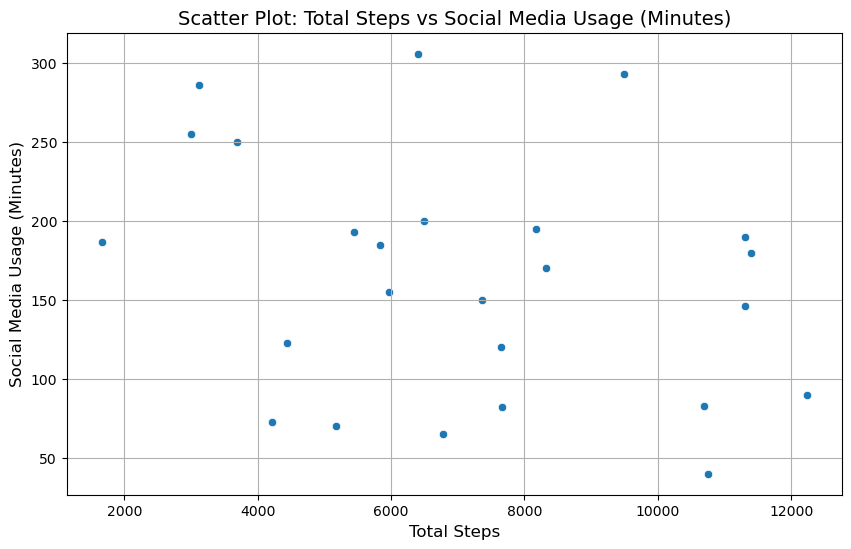

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSteps', y='Minute', data=merged_data)
plt.title('Scatter Plot: Total Steps vs Social Media Usage (Minutes)', fontsize=14)
plt.xlabel('Total Steps', fontsize=12)
plt.ylabel('Social Media Usage (Minutes)', fontsize=12)
plt.grid(True)
plt.show()

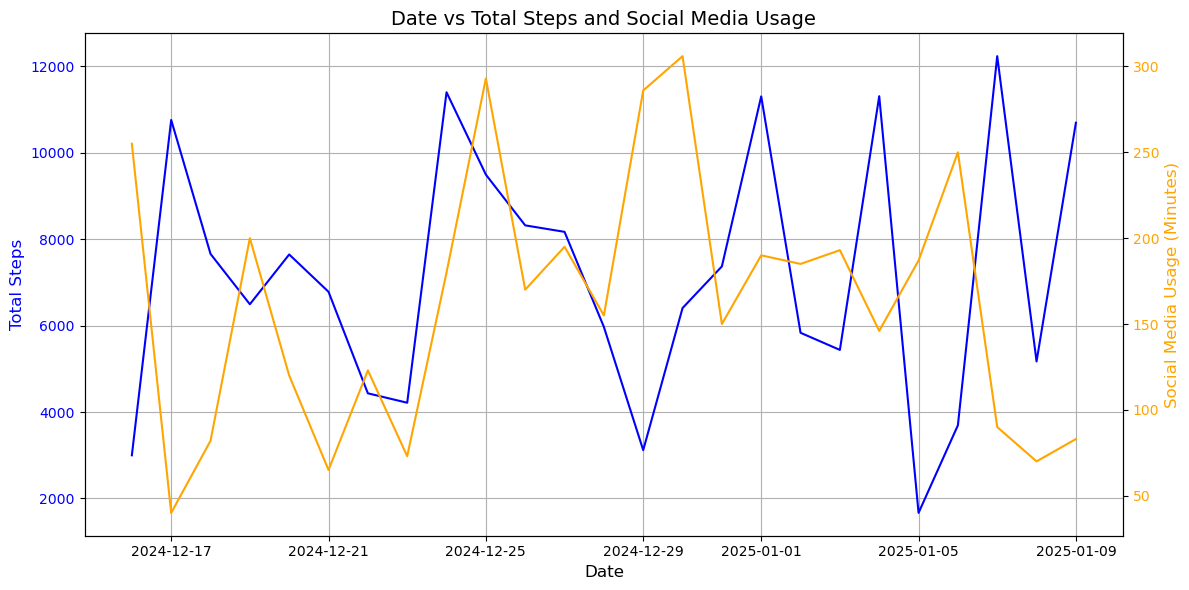

In [41]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Steps on the primary y-axis
ax1.set_title('Date vs Total Steps and Social Media Usage', fontsize=14)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Total Steps', fontsize=12, color='blue')
ax1.plot(merged_data['Date'], merged_data['TotalSteps'], label='Total Steps', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Plot Social Media Usage on the secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Social Media Usage (Minutes)', fontsize=12, color='orange')
ax2.plot(merged_data['Date'], merged_data['Minute'], label='Social Media Usage', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

fig.tight_layout()
plt.show()

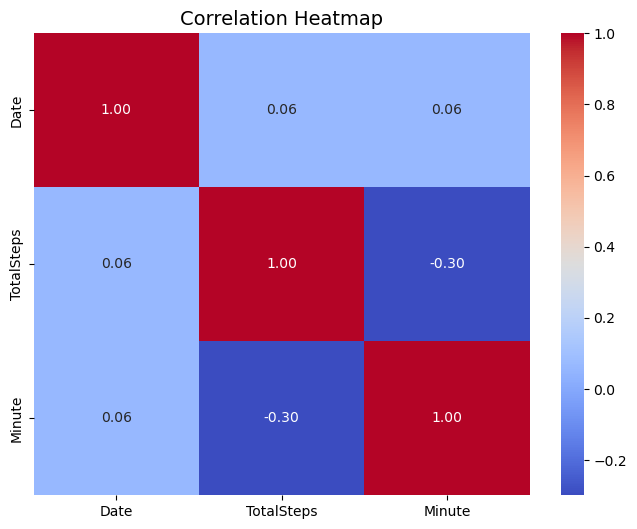

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

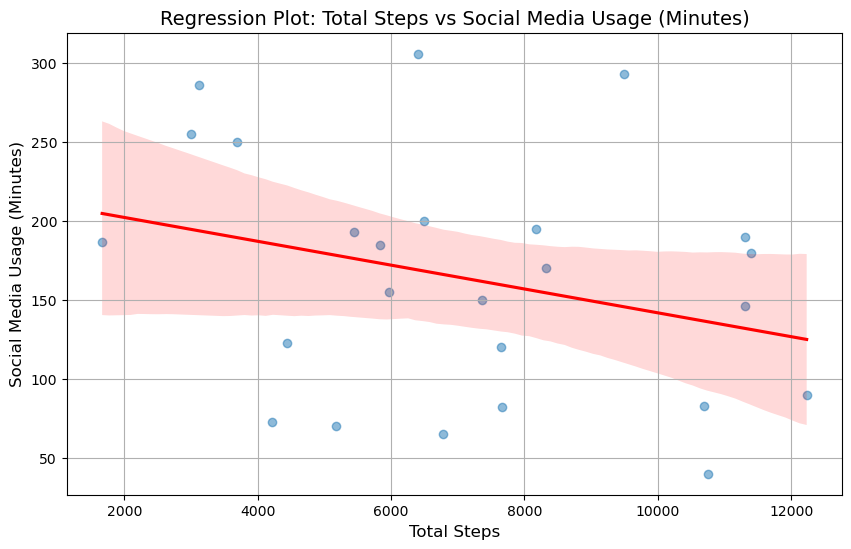

In [50]:
plt.figure(figsize=(10, 6))
sns.regplot(x='TotalSteps', y='Minute', data=merged_data, line_kws={"color":"red"}, scatter_kws={"alpha":0.5})
plt.title('Regression Plot: Total Steps vs Social Media Usage (Minutes)', fontsize=14)
plt.xlabel('Total Steps', fontsize=12)
plt.ylabel('Social Media Usage (Minutes)', fontsize=12)
plt.grid(True)
plt.show()

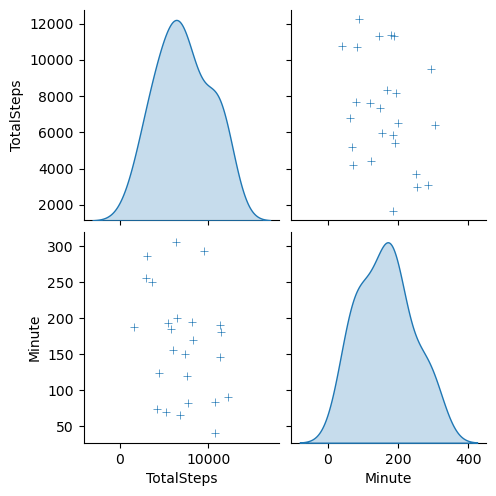

In [53]:
sns.pairplot(merged_data, diag_kind='kde', markers='+')
plt.show()